# A model to predict the number of deaths due to covid-19 Pandemic in Africa

# Isaac Etungu

<b>M21/MIT/742U</b>

In this test, I'll will design a model to predict the number of deaths due to covid-19 
Pandemic in Africa. 

My focus will be predicting daily deaths using pearson correlation & identifying the most severe transimission mode of covid-19 with respect to correlations, p-value, and F-1Scores performance evaluation metrices

Data set from URL: https://covid19.who.int/table <b>as at June 27th 2021 at 4.32.12 PM <b/>

<b>Importing libraries</b>

In [1]:
import pandas as pd
import numpy as np

<b>Loading the data set</b>

In [2]:
file=pd.read_csv("WHO COVID-19 global table data June 27th 2021 at 4.32.12 PM (1) (1).csv",sep=",")#This has global regions
Data= file.loc[(file['WHO Region'] == 'Africa')]#Reads only for America region
Data.head()#preview first five rows

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours,Transmission Classification
19,South Africa,Africa,1877143,3165.04,91064,153.54,16078,59406,100.16,1083,1.83,148,Community transmission
67,Ethiopia,Africa,275601,239.73,826,0.72,99,4296,3.74,34,0.03,4,Community transmission
81,Kenya,Africa,181239,337.06,3957,7.36,741,3538,6.58,104,0.19,24,Community transmission
83,Nigeria,Africa,167401,81.21,259,0.13,70,2118,1.03,1,0.00,0,Community transmission
87,Zambia,Africa,140620,764.91,18376,99.96,3594,1855,10.09,330,1.80,61,Community transmission


<b>More information on the data set</b>

In [3]:
Data.shape

(50, 13)

In [4]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50 entries, 19 to 233
Data columns (total 13 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   Name                                                          50 non-null     object 
 1   WHO Region                                                    50 non-null     object 
 2   Cases - cumulative total                                      50 non-null     int64  
 3   Cases - cumulative total per 100000 population                50 non-null     float64
 4   Cases - newly reported in last 7 days                         50 non-null     int64  
 5   Cases - newly reported in last 7 days per 100000 population   50 non-null     float64
 6   Cases - newly reported in last 24 hours                       50 non-null     int64  
 7   Deaths - cumulative total                                     50 non-nu

In [5]:
Data.describe()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
count,5.000000e+01,50.000000,50.000000,50.000000,50.000000,50.0000,50.000000,50.000000,50.000000,50.000000
mean,7.822606e+04,1060.529800,3215.760000,45.727200,610.260000,1870.3800,12.735600,49.460000,0.533800,8.380000
std,2.653622e+05,2523.380276,13082.564441,155.697475,2367.162193,8358.0771,21.314941,163.081701,1.534344,25.245642
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000
25%,6.333500e+03,101.417500,38.750000,0.837500,0.250000,116.2500,1.197500,0.000000,0.000000,0.000000
50%,1.995850e+04,230.955000,243.000000,2.670000,14.000000,255.5000,3.170000,3.000000,0.035000,0.000000
75%,4.712000e+04,505.582500,947.500000,10.495000,102.000000,902.7500,10.315000,18.000000,0.150000,1.000000
max,1.877143e+06,15364.980000,91064.000000,1004.610000,16078.000000,59406.0000,100.160000,1083.000000,7.790000,148.000000


Dataset has 100 rows & 6 columns

# 1. Pearson Correlations  

<b>Correlation</b> 

In [6]:
#Checking most how correlated variables are
Data.corr()

,Cases - cumulative total,Cases - cumulative total per 100000 population,Cases - newly reported in last 7 days,Cases - newly reported in last 7 days per 100000 population,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 100000 population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 7 days per 100000 population,Deaths - newly reported in last 24 hours
Cases - cumulative total,1.000000,0.105260,0.969138,0.099370,0.947494,0.993836,0.575956,0.933022,0.148798,0.830222
Cases - cumulative total per 100000 population,0.105260,1.000000,0.129520,0.858236,0.146628,0.106699,0.688792,0.120342,0.503043,0.140741
Cases - newly reported in last 7 days,0.969138,0.129520,1.000000,0.157503,0.990264,0.972590,0.606945,0.981895,0.246266,0.909088
Cases - newly reported in last 7 days per 100000 population,0.099370,0.858236,0.157503,1.000000,0.204192,0.095111,0.516443,0.172471,0.696305,0.266116
Cases - newly reported in last 24 hours,0.947494,0.146628,0.990264,0.204192,1.000000,0.948781,0.638525,0.984149,0.356110,0.950576
Deaths - cumulative total,0.993836,0.106699,0.972590,0.095111,0.948781,1.000000,0.586248,0.927264,0.132664,0.818021
Deaths - cumulative total per 100000 population,0.575956,0.688792,0.606945,0.516443,0.638525,0.586248,1.000000,0.596181,0.557328,0.611624
Deaths - newly reported in last 7 days,0.933022,0.120342,0.981895,0.172471,0.984149,0.927264,0.596181,1.000000,0.329794,0.948454
Deaths - newly reported in last 7 days per 100000 population,0.148798,0.503043,0.246266,0.696305,0.356110,0.132664,0.557328,0.329794,1.000000,0.521511
Deaths - newly reported in last 24 hours,0.830222,0.140741,0.909088,0.266116,0.950576,0.818021,0.611624,0.948454,0.521511,1.000000


<b>Generate related variables</b>

In [7]:
Data[['Cases - newly reported in last 24 hours','Cases - newly reported in last 7 days']].corr()

,Cases - newly reported in last 24 hours,Cases - newly reported in last 7 days
Cases - newly reported in last 24 hours,1.000000,0.990264
Cases - newly reported in last 7 days,0.990264,1.000000


from the data set, I find that there is a strong positive relationship between cases reported in the last one week and those in the last 24 hours

<b>Hypothesis</b>
1. Null Hypthesis, <b>Ho</b>: Deaths reported in the last 24 hours are not from cases reported in the last 7 days

2. Alternative Hypthosesis, <b>H1</b>: Deaths reported in the last 24 hours are from cases reported in the last 7 days

<b>visualising related variables</b>

data1: mean=12748.765 stdv=12684.714
data2: mean=12760.848 stdv=12684.284


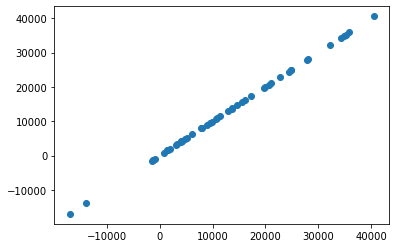

In [8]:
#data1=cases in last 7days,std=13082.564441,mean=13082.564441
#data2=deaths in last 24 hours, std=25.245642,mean =8.380000
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = 13082.564441 * randn(50) + 13082.564441
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2)

pyplot.show()

A scatter plot of the two variables shows that there is a relationship between the two variables, there is an increasing trend

In [9]:
#covariance of the variables
np. cov(data1, data2)

array([[1.64185690e+08, 1.64179925e+08],
       [1.64179925e+08, 1.64174557e+08]])

In [10]:
#The covariance between the two variables is positive, <b>16115.10062214</b>. suggesting the variables change in the same direction as we expect.

<b>calculate the Pearson's correlation between two variables</b>

In [11]:
from numpy.random import randn
from numpy.random import seed
from scipy.stats import pearsonr
# seed random number generator
seed(1)
# prepare data
data1 = 130.211952 * randn(50) + 4279.780000
data2 = data1 + (25.245642 * randn(50) + 8.380000)
# calculate Pearson's correlation
corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.988


The two variables are positively correlated and that the correlation is <b>0.988</b>.
This suggests a high level of correlation between cases reported in the last 7days and deaths reported in the last 24 hours, given that the value is above <b>0.5</b> and close to <b>1.0</b>.

<b>Testing Hypothesis</b>

In [12]:
import scipy.stats

In [13]:
r,p =scipy.stats.pearsonr(data1, data2)
r

0.9879056221276716

In [14]:
p

1.6129895892928053e-40

Since the <b>p-value, <b>0.1687<b> is <b>0.5</b> then I reject <b>Ho<b> and accept the <b>H1</b> that Deaths reported in the last 24 hours are arising from cases reported in the last 7days

Decision tree classifier

In [15]:
%%capture
! pip install seaborn

In [16]:
#Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
%matplotlib inline

In [17]:
Data['Transmission Classification'].value_counts().to_frame()

,Transmission Classification
Community transmission,47
Clusters of cases,1
No cases,1
Pending,1


In [18]:
#Printing what will help in this analysis
Data[['Cases - newly reported in last 24 hours','Cases - newly reported in last 7 days',
        'Deaths - newly reported in last 24 hours','Transmission Classification']].head()

,Cases - newly reported in last 24 hours,Cases - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
19,16078,91064,148,Community transmission
67,99,826,4,Community transmission
81,741,3957,24,Community transmission
83,70,259,0,Community transmission
87,3594,18376,61,Community transmission


<b>One hot encoding</b>

In [19]:
#Use 'one hot encoding technique' to convert categorical varables to binary variables and append them to the New_df Data Frame
new_df = Data[['Cases - newly reported in last 24 hours','Cases - newly reported in last 7 days',
        'Deaths - newly reported in last 24 hours','Transmission Classification']]
new_df= pd.concat([new_df,pd.get_dummies(Data['Transmission Classification'])], axis=1)
new_df.drop(['No cases'], axis = 1,inplace=True)
new_df.drop(['Pending'], axis = 1,inplace=True)
new_df.drop(['Transmission Classification'], axis = 1,inplace=True)
new_df.head()

,Cases - newly reported in last 24 hours,Cases - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Clusters of cases,Community transmission
19,16078,91064,148,0,1
67,99,826,4,0,1
81,741,3957,24,0,1
83,70,259,0,0,1
87,3594,18376,61,0,1


Pre-processing
Using New_df as the WHO COVID-19 global table data July 1st 2021 at 7.47.07 PM.csv data read by pandas, declare the following variables:

X as the Feature Matrix (data of New_df)

y as the response vector (target)

In [20]:
from sklearn import preprocessing

In [21]:
#Assign X to New_df as new data set
X = new_df
#Print first five columns
X[0:5]

,Cases - newly reported in last 24 hours,Cases - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Clusters of cases,Community transmission
19,16078,91064,148,0,1
67,99,826,4,0,1
81,741,3957,24,0,1
83,70,259,0,0,1
87,3594,18376,61,0,1


Checking the data labels y

In [22]:
y = Data['Transmission Classification'].values
y[0:5]

array(['Community transmission', 'Community transmission',
       'Community transmission', 'Community transmission',
       'Community transmission'], dtype=object)

In [23]:
#Lets assign intergies to our labels for easy analysie. We call in the replace function to do so
y_collection = Data['Transmission Classification'].replace(to_replace=['Community transmission'], value=[2]).values
y_collection[0:5]

array([2, 2, 2, 2, 2], dtype=object)

Normalizing the Data

In [24]:
#Data Standardization give data zero mean and unit variance
from sklearn.preprocessing import StandardScaler
X_initial = X
scaler = preprocessing.StandardScaler().fit(X_initial)
X= scaler.transform(X)
X[0:5]

array([[ 6.60063639,  6.78308321,  5.58660767, -0.14285714,  0.25264558],
       [-0.21817288, -0.18452209, -0.17525671, -0.14285714,  0.25264558],
       [ 0.05579142,  0.05723385,  0.62500223, -0.14285714,  0.25264558],
       [-0.23054821, -0.22830223, -0.3353085 , -0.14285714,  0.25264558],
       [ 1.27326829,  1.17057746,  2.10548128, -0.14285714,  0.25264558]])

In [25]:
#Import libraries
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [26]:
!pip install six

In [27]:
!pip install pydotplus

In [28]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from six import StringIO
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [29]:
#Build an empty DecisionTree object with depth 4
CovidTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
CovidTree # it shows the default parameters

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [30]:
#%conda update scikit-learn

In [31]:
#Train the decision tree using the global X data set.
CovidTree.fit(X_initial, y)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [32]:
%conda install graphviz

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.2
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


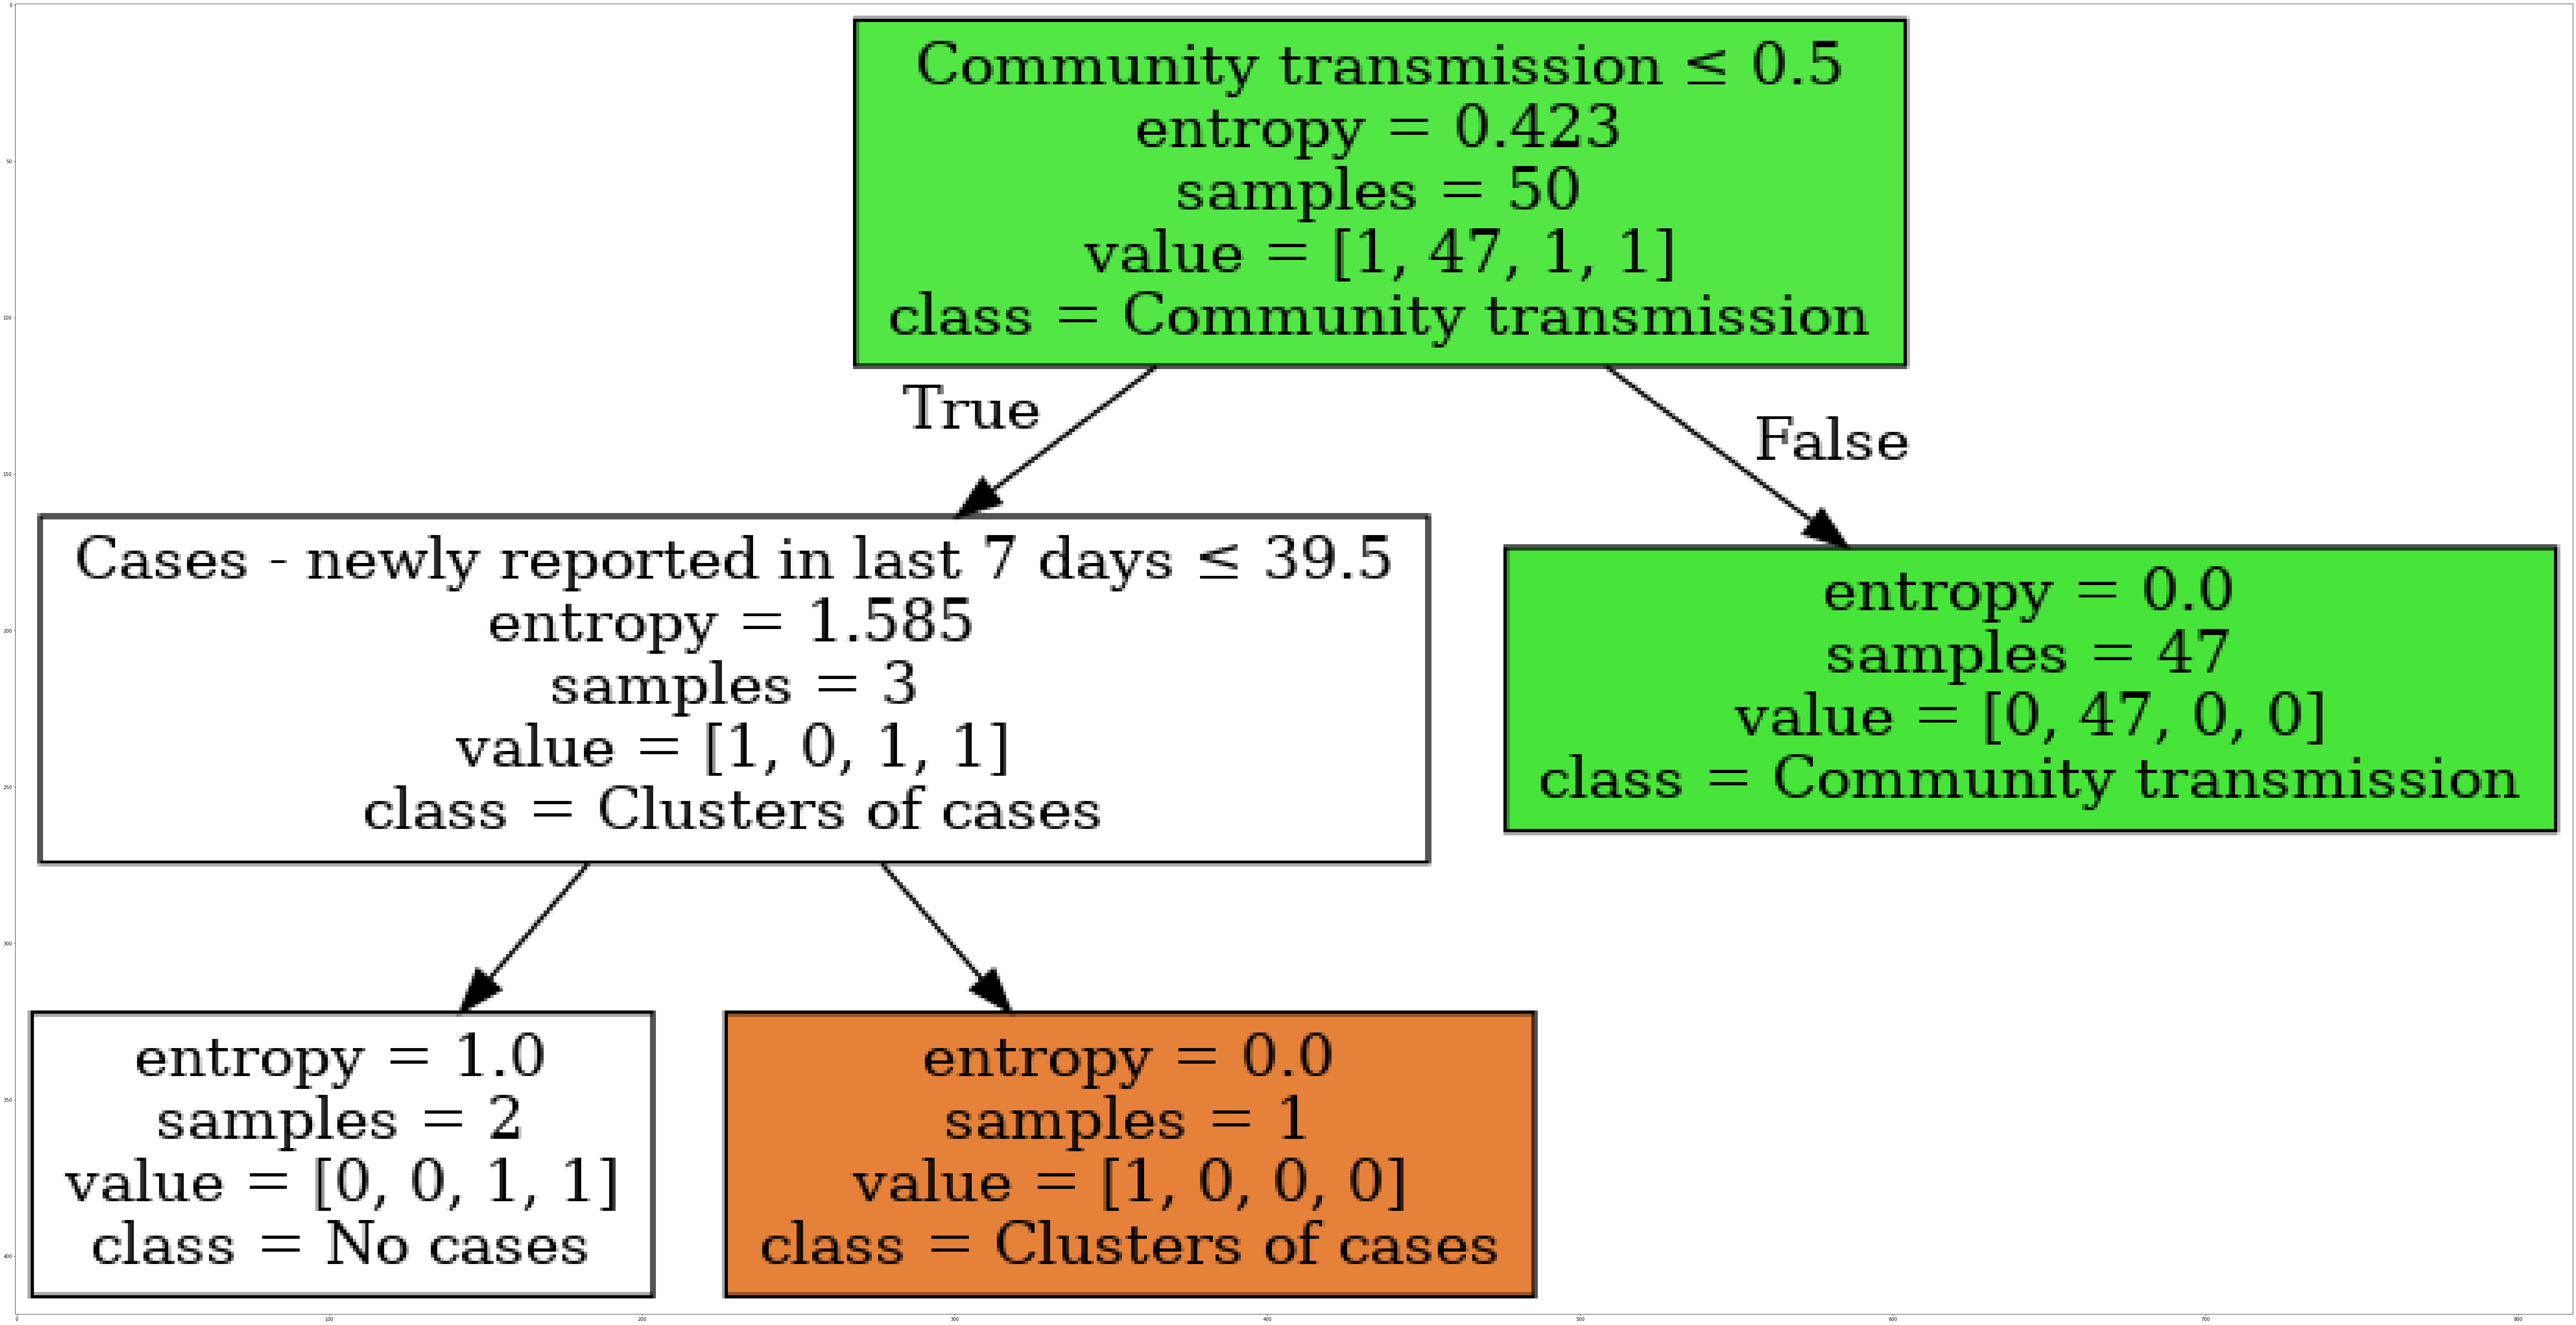

In [33]:
from six import StringIO
from sklearn.externals.six import StringIO
dot_data = StringIO()
filename = "TCtree.png"
new_dfNames = new_df.columns
targetNames = Data['Transmission Classification'].tolist()
out=tree.export_graphviz(CovidTree,feature_names=new_dfNames, out_file=dot_data, class_names= np.unique(y), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Evaluating the Accuracy of Decison Tree Algorithm
Use Decision Tree object previously trained.

In [34]:
from sklearn.datasets import load_iris
from sklearn import tree
clf = tree.DecisionTreeClassifier()
iris = load_iris()
clf = clf.fit(iris.data, iris.target)
tree.export_graphviz(clf, out_file='tree.dot')

In [35]:
yhat_tree=CovidTree.predict(X_initial)
tree_jacc_test=metrics.jaccard_score(y, yhat_tree, average='micro')
tree_f1_test=metrics.f1_score(y, yhat_tree, average ='macro')
tree_cnf_matrix = confusion_matrix(y, yhat_tree)
print("Accuracy is ", tree_jacc_test, " F1 is" , tree_f1_test)
print(classification_report(y, yhat_tree))
tree_cnf_matrix

Accuracy is  0.9607843137254902  F1 is 0.6666666666666666
                        precision    recall  f1-score   support

     Clusters of cases       1.00      1.00      1.00         1
Community transmission       1.00      1.00      1.00        47
              No cases       0.50      1.00      0.67         1
               Pending       0.00      0.00      0.00         1

              accuracy                           0.98        50
             macro avg       0.62      0.75      0.67        50
          weighted avg       0.97      0.98      0.97        50



/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/srv/conda/envs/notebook/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 1,  0,  0,  0],
       [ 0, 47,  0,  0],
       [ 0,  0,  1,  0],
       [ 0,  0,  1,  0]])

# REMARKS
The Accuracy is 0.96 and F1 is 0.6.

This indicates that <b>Community Transmission mode</b> is the most significant and dangerous mode of transmission of Covid-19 at the moment in Africa. 
This reqiuires interventions from African governments, Health authorities and every body so as to curb the spread of the disease.

# End
Author, Isaac Etungu